In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [5]:
# Cleaning: Use 3 methods for missing values (Cleaning). As the csv file has no missing values, just remove some values from the csv yourself (tell Amin which values you removed) e.g. one from sex etc. Then  preform the cleaning and explain how you have cleaned the data (refer to use case jupyter notebooks for help). Cleaning of missing values using back fill or mean etc etc.


import pandas as pd
import numpy as np

# Load the dataset
file_path = r"C:\Users\saads\Desktop\Data science\my project\mini project 1\heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(file_path)

print("Original Dataset:")
print(data.head())



Original Dataset:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6      

In [7]:
data.loc[1, 'age'] = None  
data.loc[3, 'sex'] = None
data.loc[4, 'time'] = None 

# Check if missing value introduced successfully
print("\nDataset with Missing Values:")
print(data.head())





Dataset with Missing Values:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1   NaN        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130  1.0   
1                    0  263358.03               1.1           136  1.0   
2                    0  162000.00               1.3           129  1.0   
3                    0  210000.00               1.9           137  NaN   
4                    0  327000.00               2.7           116  0.0   

   smoking  time  DEATH_EVENT  
0        0   4.0            1  
1        0

In [9]:
# Explain: The missing values can be seen in age, sex and time.

In [11]:
# Method 1: Backfilling
data_backfilled = data.fillna(method='bfill')

# Method 2: Mean Imputation
data_mean_imputed = data.fillna(data.mean())

# Method 3: Dropping Rows with Missing Values
data_dropped = data.dropna()


C:\Users\saads\AppData\Local\Temp\ipykernel_20548\1799123261.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_backfilled = data.fillna(method='bfill')


In [12]:
# Display the cleaned datasets
print("\nDataset after Backfilling:")
print(data_backfilled.head())

print("\nDataset after Mean Imputation:")
print(data_mean_imputed.head())

print("\nDataset after Dropping Rows with Missing Values:")
print(data_dropped.head())


Dataset after Backfilling:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  65.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130  1.0   
1                    0  263358.03               1.1           136  1.0   
2                    0  162000.00               1.3           129  1.0   
3                    0  210000.00               1.9           137  0.0   
4                    0  327000.00               2.7           116  0.0   

   smoking  time  DEATH_EVENT  
0        0   4.0            1  
1        0  

In [13]:
#Perform profiling (web based), profile report. (See file 1-EDA-Profiling.ipynb)

# Get the data types of columns
column_data_types = data.dtypes

# Print the data types of columns
print("Data Types of Columns:")
print(column_data_types)

Data Types of Columns:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                         float64
smoking                       int64
time                        float64
DEATH_EVENT                   int64
dtype: object


In [14]:
# Calculate the number of missing values in each column
missing_values_count = data.isnull().sum()

# Print the number of missing values in each column
print("Number of Missing Values in Each Column:")
print(missing_values_count)

Number of Missing Values in Each Column:
age                         1
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         1
smoking                     0
time                        1
DEATH_EVENT                 0
dtype: int64


In [15]:
# Generate summary statistics for numerical columns
summary_statistics = data.describe()

# Print the summary statistics
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  298.000000  299.000000                299.000000  299.000000   
mean    60.853470    0.431438                581.839465    0.418060   
std     11.909991    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.00

In [16]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.086716                 -0.076891   
anaemia                   0.086716  1.000000                 -0.190741   
creatinine_phosphokinase -0.076891 -0.190741                  1.000000   
diabetes                 -0.102575 -0.012729                 -0.009639   
ejection_fraction         0.060111  0.031557                 -0.044080   
high_blood_pressure       0.092197  0.038182                 -0.070590   
platelets                -0.052376 -0.043786                  0.024463   
serum_creatinine          0.158804  0.052174                 -0.016408   
serum_sodium             -0.046220  0.041882                  0.059550   
sex                       0.069157 -0.097908                  0.081096   
smoking                   0.017555 -0.107290                  0.002421   
time                     -0.226936 -0.136206                 -0.011704   
DEATH_EVENT       

In [17]:
# Find unique values in each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Print unique values in each column
for column, values in unique_values.items():
    print(f"Unique values in {column}:")
    print(values)
    print()

Unique values in age:
[75.       nan 65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    55.    42.    41.    67.    79.    59.
 44.    63.    86.    66.    43.    46.    61.    81.    52.    64.
 40.    60.667 73.    77.    78.    54.    47.    56.   ]

Unique values in anaemia:
[0 1]

Unique values in creatinine_phosphokinase:
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  1

In [18]:
# Find the most frequent values in each column
most_frequent_values = {}
for column in data.columns:
    most_frequent_values[column] = data[column].value_counts().idxmax()

# Print the most frequent values in each column
for column, value in most_frequent_values.items():
    print(f"Most frequent value in {column}: {value}")

Most frequent value in age: 60.0
Most frequent value in anaemia: 0
Most frequent value in creatinine_phosphokinase: 582
Most frequent value in diabetes: 0
Most frequent value in ejection_fraction: 35
Most frequent value in high_blood_pressure: 0
Most frequent value in platelets: 263358.03
Most frequent value in serum_creatinine: 1.0
Most frequent value in serum_sodium: 136
Most frequent value in sex: 1.0
Most frequent value in smoking: 0
Most frequent value in time: 187.0
Most frequent value in DEATH_EVENT: 0


In [19]:
# Compute quantile statistics for numerical columns
quantile_statistics = data.quantile([0.25, 0.5, 0.75])

# Print quantile statistics
print("Quantile Statistics:")
print(quantile_statistics)

Quantile Statistics:
       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0.25  51.0      0.0                     116.5       0.0               30.0   
0.50  60.0      0.0                     250.0       0.0               38.0   
0.75  70.0      1.0                     582.0       1.0               45.0   

      high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0.25                  0.0   212500.0               0.9         134.0  0.0   
0.50                  0.0   262000.0               1.1         137.0  1.0   
0.75                  1.0   303500.0               1.4         140.0  1.0   

      smoking    time  DEATH_EVENT  
0.25      0.0   73.25          0.0  
0.50      0.0  115.00          0.0  
0.75      1.0  204.00          1.0  


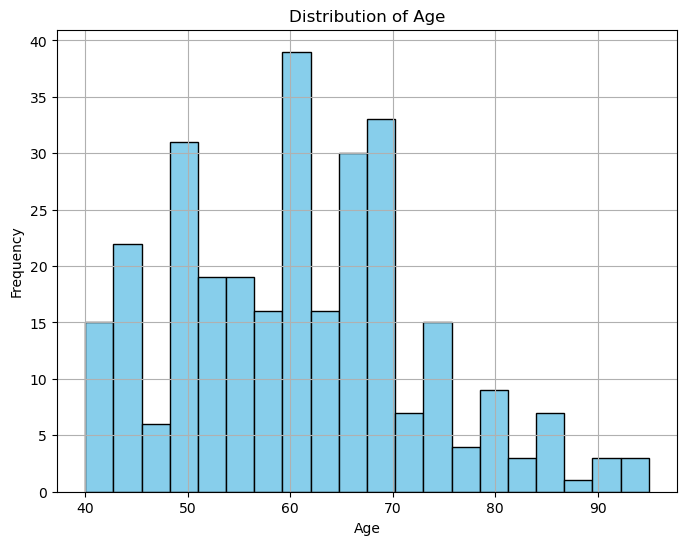

In [20]:
# Visualisation: Show at least 3 plots using matplotlib. 

import matplotlib.pyplot as plt

# Plot 1: Histogram of 'age'
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

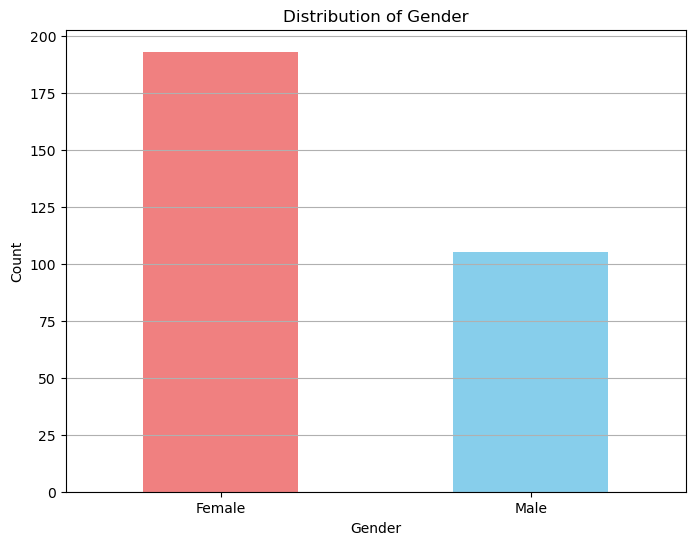

In [21]:
# Plot 2: Bar plot of 'sex'
plt.figure(figsize=(8, 6))
data['sex'].value_counts().plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.grid(axis='y')
plt.show()

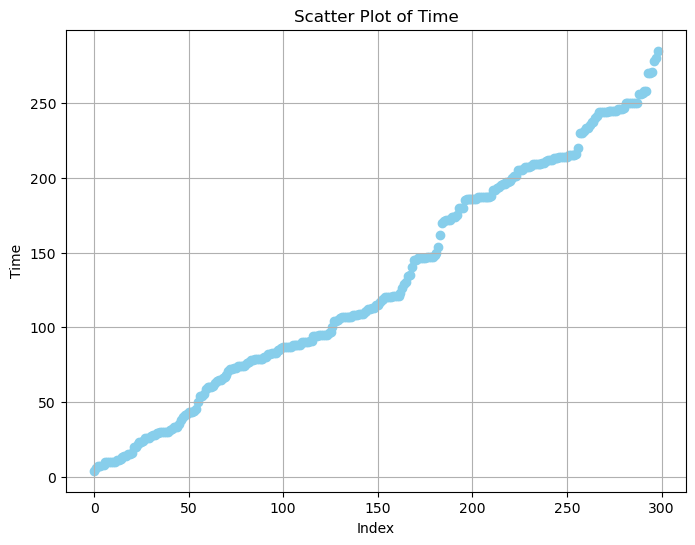

In [22]:
# Plot 3: Scatter plot of 'time'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data['time'])), data['time'], color='skyblue')
plt.title('Scatter Plot of Time')
plt.xlabel('Index')
plt.ylabel('Time')
plt.grid(True)
plt.show()